<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=6> Proyecto Discrepo </font>
</div>
&nbsp;



    
<div align="center"> 
<font size=8> Esquema </font>
</div>




- **Para**: Proyecto Discrepo

- **Fecha**: 
  - Inicio: 2024/10/20
        
- **Objetivos**: Diseño del experimento de doble rendija para la medida de la retardancia.

- **Descripción** 


- **Referencias**: Apuntes de la asignatura Óptica.

- **Autores**: Luis Miguel Sánchez Brea

- **Estado**: Iniciado

**Table of contents**<a id='toc0_'></a>    
- [Simulación de doble rendija para sacar distancias](#toc1_)    
  - [2D](#toc1_1_)    
  - [1D](#toc1_2_)    
  - [En el plano focal de la lente](#toc1_3_)    
  - [Conclusiones](#toc1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Esta simulación consta de los siguientes pasos:
- Crear una fuente de luz polarizada linealmente a 0º y otra a 90º
- Posteriormente pasan por un retardador
- Y finalmente por un polarizador lineal a 45º
- Tras esto ambos rayos tendrán la misma polarización por lo que podremos ver la interferencia cuando estos rayos interactuan

In [182]:
#Cargamos los módulos
import numpy as np
import matplotlib.pyplot as plt 
import random
from py_pol.jones_matrix import Jones_matrix, degrees
from py_pol.jones_vector import Jones_vector
from scipy.fft import fft

# <a id='toc1_'></a>[Simulación de doble rendija para sacar distancias](#toc0_)

## <a id='toc1_1_'></a>[2D](#toc0_)

In [183]:
from diffractio import np, plt, um, mm, nm, degrees
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

In [184]:
size_mask_x, size_mask_y = 1*mm, 2*mm
wavelength=632*nm
w0 = 1*mm #beam width
slit_size = 100*um
slit_separation = 400*um
z_obs = 500*mm
size_obs_x, size_obs_y = 5*mm, 5*mm

In [185]:
x0=np.linspace(-size_mask_x/2, size_mask_x/2, 512)
y0=np.linspace(-size_mask_y/2, size_mask_y/2, 1024)


In [186]:
u0=Scalar_source_XY(x0,y0,wavelength)
u0.gauss_beam(r0=(0*um, 0*um), w0=w0, z0=0, A=1, theta=0.0)

In [187]:
double_slit=Scalar_mask_XY(x0,y0,wavelength)
double_slit.double_slit(x0=0, size=slit_size, separation=slit_separation,
                    angle = 0*degrees)

In [188]:
u1 = u0*double_slit

In [189]:
xout=np.linspace(-size_obs_x/2, size_obs_x/2, 512)
yout=np.linspace(-size_obs_y/2, size_obs_y/2, 1024)

u_camera=u1.CZT(z=z_obs, xout=xout, yout=yout)

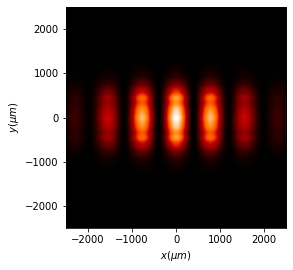

In [190]:
u_camera.draw(logarithm=1e1)

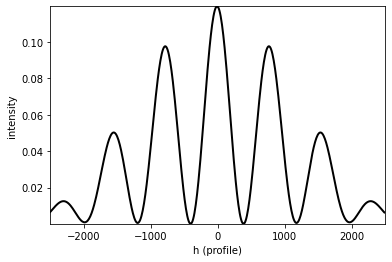

In [191]:
u_camera.draw_profile(point1=(-size_obs_x/2,0), point2=(+size_obs_x/2,0))

## <a id='toc1_2_'></a>[1D](#toc0_)

In [192]:
from diffractio import np, plt, um, mm, nm, degrees
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_sources_X import Scalar_source_X

In [193]:
size_mask_x = 1*mm
wavelength=632*nm
w0 = 1*mm #beam width
slit_size = 100*um
slit_separation = 400*um
z_obs = 500*mm
size_obs_x = 5*mm
num_pixels_1D = 4096

In [194]:
x0=np.linspace(-size_mask_x/2, size_mask_x/2, num_pixels_1D)


In [195]:
u0=Scalar_source_X(x0, wavelength)
u0.gauss_beam(x0=0*um, w0=w0, z0=0, A=1, theta=0.0)

In [196]:
double_slit=Scalar_mask_X(x0,wavelength)
double_slit.double_slit(x0=0, size=slit_size, separation=slit_separation)

In [197]:
u1 = u0*double_slit

In [198]:
xout=np.linspace(-size_obs_x/2, size_obs_x/2, 512)

u_camera=u1.CZT(z=z_obs, xout=xout)

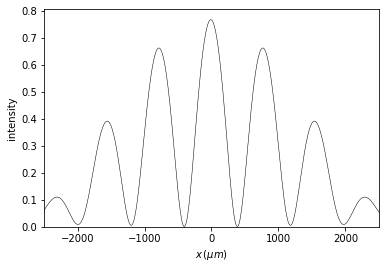

In [199]:
u_camera.draw(logarithm=1e1)

## <a id='toc1_3_'></a>[En el plano focal de la lente](#toc0_)

In [298]:
lens_focal =  200*mm

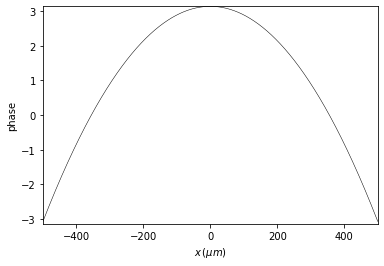

In [299]:
lens=Scalar_mask_X(x0,wavelength)
lens.lens(x0=0*um, focal=lens_focal)
lens.draw('phase')

In [300]:
u1_lens = u0*double_slit*lens

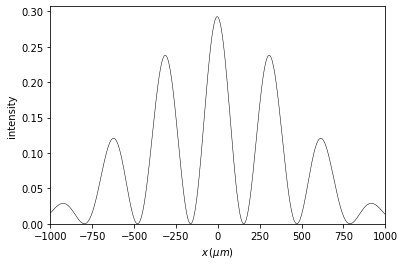

In [301]:
xout=np.linspace(-size_obs_x/2, size_obs_x/2, 512)
xout=np.linspace(-1*mm, 1*mm, 512)

u_camera=u1_lens.CZT(z=lens_focal, xout=xout)
u_camera.draw(logarithm=0)

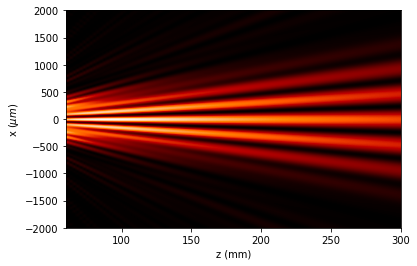

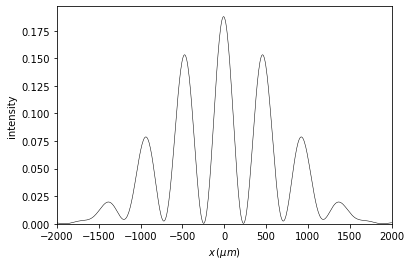

In [281]:
z0=np.linspace(60*mm, 300*mm, 100)
xout=np.linspace(-2*mm, 2*mm, 512)
u_xz = u1.CZT(z=z0, xout=xout)
u_xz.draw(logarithm=1e1, z_scale='mm')

u_xz.final_field().draw()


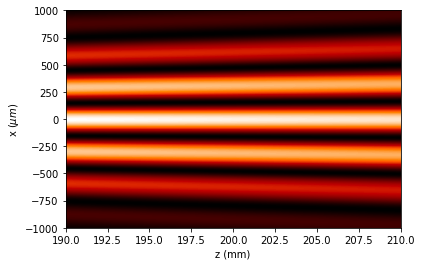

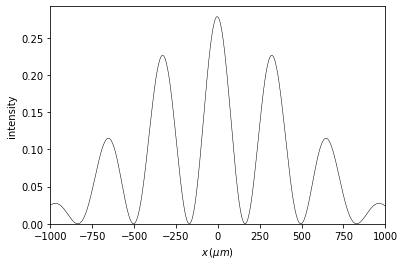

In [ ]:
z0=np.linspace(lens_focal-10*mm, lens_focal+10*mm, 100)
xout=np.linspace(-1*mm, 1*mm, 512)
u_xz = u1_lens.CZT(z=z0, xout=xout)
u_xz.draw(logarithm=1e1, z_scale='mm')

u_xz.final_field().draw()


## <a id='toc1_4_'></a>[Conclusiones](#toc0_)

El uso de una lente las hace la imagen más pequeña, pero mucho más cercana, como era de esperar. 

Podemos usar una lente de 200 mm para obtener franjas de 300 micras de periodo. Para un pixel de 1.5 eso significa 200 pixeles por periodo.

Bastante bien para estudiar el desplazamiento.

Las tolerancias son bastante grandes.